In [1]:
#### arrays, one d, 2 d arrays (matrices vectors)
#### tensors ##### accelerated over a gpu
import torch

In [5]:
torch.tensor([1,2,3]).shape

torch.Size([3])

In [4]:
torch.tensor([[1,2,3]]).shape

torch.Size([1, 3])

In [6]:
torch.tensor([1,2,3]).size()

torch.Size([3])

In [8]:
torch.zeros([1,2,2,3])

tensor([[[[0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.]]]])

In [10]:
torch.tensor([1,2]).tolist()

[1, 2]

In [12]:
torch.tensor([1,2,3]).numpy()

array([1, 2, 3])

In [14]:
device=torch.device("cuda" if torch.cuda.is_available() else 'cpu') #####

In [15]:
device

device(type='cpu')

In [16]:
torch.zeros([1,2,2,3]).to(device)

tensor([[[[0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.]]]])

In [17]:
#### Gradient descent (gradient matrix) 
torch.zeros([1,2,3],requires_grad=True)

tensor([[[0., 0., 0.],
         [0., 0., 0.]]], requires_grad=True)

Minmize $X^2+4X$

In [18]:
x=torch.tensor(0.0,requires_grad=True)

In [19]:
z=x*x+4*x ### forward pass

In [20]:
z.backward()

In [21]:
x.grad ### Grad of x at 0 wrt z

tensor(4.)

In [22]:
z=x*x+4*x

In [23]:
z.backward()

In [24]:
x.grad ### Start accumulating the value of gradients,
### Pass 1
### grad=4
### Pass 2
### grad_now+grad_prev=4+4=8


tensor(8.)

In [25]:
x.grad.zero_()

tensor(0.)

In [26]:
x.grad

tensor(0.)

In [27]:
### Forward pass
#### backward()
#### zero out the graidients
### xnew=xold-lr*(sum(grad))

In [30]:
x=torch.tensor(0.0,requires_grad=True)
lr=0.01
for i in range(10):
    z=x*x+4*x
    z.backward() ### dz/dx
    with torch.no_grad(): ##Disables any gradient computation
        x-=lr*x.grad
        x.grad.zero_()
    print(f"Z {z}, x: {x}")

Z 0.0, x: -0.03999999910593033
Z -0.15839999914169312, x: -0.07919999957084656
Z -0.31052735447883606, x: -0.11761599779129028
Z -0.4566304683685303, x: -0.15526367723941803
Z -0.5969479084014893, x: -0.19215840101242065
Z -0.7317087650299072, x: -0.22831523418426514
Z -0.8611330986022949, x: -0.2637489140033722
Z -0.9854321479797363, x: -0.29847392439842224
Z -1.104809045791626, x: -0.3325044512748718
Z -1.2194585800170898, x: -0.3658543527126312


In [34]:
### Autodiff
### xy=750=>x=750/y
## x+10y Minimize this
### 750/y+y*10

In [33]:
x=torch.tensor(1.0,requires_grad=True)
lr=0.01
for i in range(100):
    z=(750/x)+x*10
    z.backward()
    with torch.no_grad():
        x-=lr*x.grad
        x.grad.zero_()
    print(f"Z: {z}, x: {x}")

Z: 760.0, x: 8.399999618530273
Z: 173.2857208251953, x: 8.406291961669922
Z: 173.28179931640625, x: 8.41242504119873
Z: 173.27809143066406, x: 8.418403625488281
Z: 173.27456665039062, x: 8.42423152923584
Z: 173.27120971679688, x: 8.429913520812988
Z: 173.2680206298828, x: 8.435453414916992
Z: 173.26498413085938, x: 8.4408540725708
Z: 173.26211547851562, x: 8.446120262145996
Z: 173.25936889648438, x: 8.451254844665527
Z: 173.25677490234375, x: 8.45626163482666
Z: 173.25428771972656, x: 8.46114444732666
Z: 173.25193786621094, x: 8.465906143188477
Z: 173.24969482421875, x: 8.470550537109375
Z: 173.24755859375, x: 8.475079536437988
Z: 173.24554443359375, x: 8.479496955871582
Z: 173.2436065673828, x: 8.483805656433105
Z: 173.2417755126953, x: 8.488008499145508
Z: 173.24002075195312, x: 8.492108345031738
Z: 173.23837280273438, x: 8.496108055114746
Z: 173.23678588867188, x: 8.500009536743164
Z: 173.23529052734375, x: 8.503815650939941
Z: 173.23385620117188, x: 8.507528305053711
Z: 173.2324981

In [36]:
##### ML problem: 
import pandas as pd
reg=pd.read_csv("../sony/data/regression.csv")

In [37]:
reg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0


In [38]:
### mpg=b0+b1*cyl ## as a matrix product?

In [39]:
### dloss/db0, dloss/db1
#### loss=f(b0,b1)
##loss=eq
##loss.backward()
##b0.grad
##b1.grad
X=reg[['cylinders']].values
y=reg[['mpg']].values

In [40]:
## W dim?=> dloss/dW,dloss/db
W=torch.randn(1,1,requires_grad=True)
b=torch.randn(1,requires_grad=True)

In [ ]:
### loss?
loss=sum((y-XW+b)^2)/n
loss.backward()
W.grad
b.grad

In [41]:
X=torch.tensor(X)
y=torch.tensor(y)

In [45]:
lr=0.01
for i in range(100):
    diff=y-torch.matmul(X.float(),W)+b
    loss=sum(diff*diff)/y.shape[0]
    loss.backward()
    with torch.no_grad():
        W-=lr*W.grad
        b-=lr*b.grad
        W.grad.zero_()
        b.grad.zero_()
    print(f"Loss: {loss.item()}, W: {W.detach().numpy()}, b: {b.detach().numpy()}")

Loss: 106.57937383717696, W: [[1.5394461]], b: [-12.498031]
Loss: 106.29652724282161, W: [[1.5306689]], b: [-12.550415]
Loss: 106.01465406982496, W: [[1.5219065]], b: [-12.602709]
Loss: 105.73375239029292, W: [[1.5131594]], b: [-12.654913]
Loss: 105.4538148533757, W: [[1.5044272]], b: [-12.707027]
Loss: 105.17483884401985, W: [[1.4957101]], b: [-12.759052]
Loss: 104.8968210069427, W: [[1.4870082]], b: [-12.810987]
Loss: 104.61976103636141, W: [[1.4783207]], b: [-12.862833]
Loss: 104.34365403355959, W: [[1.4696487]], b: [-12.91459]
Loss: 104.06849371735905, W: [[1.4609914]], b: [-12.966257]
Loss: 103.79428275126844, W: [[1.452349]], b: [-13.017836]
Loss: 103.52101361310103, W: [[1.4437215]], b: [-13.069325]
Loss: 103.24868271208203, W: [[1.4351087]], b: [-13.120727]
Loss: 102.97728938506957, W: [[1.426511]], b: [-13.17204]
Loss: 102.70682585822372, W: [[1.417928]], b: [-13.223265]
Loss: 102.43729364242495, W: [[1.4093596]], b: [-13.274402]
Loss: 102.16868574302856, W: [[1.4008062]], b: 

In [46]:
### linear classifier.
### Can you estimate a linear classifier using autodiff
### Loss for linear classifier?
### log loss as a function of W and b, p=f(X,W,b)

In [47]:
cls=pd.read_csv("../sony/data/classification.csv")

In [48]:
cls.head(2)

,No_pregnant,Plasma_glucose,Blood_pres,Skin_thick,Serum_insu,BMI,Diabetes_func,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [49]:
X=cls[['No_pregnant']].values
y=cls[['Class']].values

In [50]:
### loss=−[𝑦𝑙𝑜𝑔(𝑝+tol)+(1−𝑦)𝑙𝑜𝑔(1−𝑝+tol)]
### p=1/(1+e^-z)
### z= XW+b

In [51]:
X=torch.tensor(X)
y=torch.tensor(y)
W=torch.randn(1,1,requires_grad=True)
b=torch.randn(1,requires_grad=True)
tol=0.0000000001
lr=0.01
for i in range(100):
    z=torch.matmul(X.float(),W)+b
    p=1.0/(1+torch.exp(-z))
    loss=-(y*torch.log(p+tol)+(1-y)*torch.log(1-p+tol)).mean()
    loss.backward()
    with torch.no_grad():
        W-=lr*W.grad
        b-=lr*b.grad
        W.grad.zero_()
        b.grad.zero_()
    print(f"Loss: {loss.item()}, W: {W}, b: {b}")

Loss: 1.5830082893371582, W: tensor([[0.2285]], requires_grad=True), b: tensor([1.4390], requires_grad=True)
Loss: 1.5427392721176147, W: tensor([[0.2093]], requires_grad=True), b: tensor([1.4335], requires_grad=True)
Loss: 1.5032926797866821, W: tensor([[0.1904]], requires_grad=True), b: tensor([1.4282], requires_grad=True)
Loss: 1.4647493362426758, W: tensor([[0.1717]], requires_grad=True), b: tensor([1.4228], requires_grad=True)
Loss: 1.4271955490112305, W: tensor([[0.1533]], requires_grad=True), b: tensor([1.4175], requires_grad=True)
Loss: 1.3907232284545898, W: tensor([[0.1351]], requires_grad=True), b: tensor([1.4123], requires_grad=True)
Loss: 1.3554285764694214, W: tensor([[0.1173]], requires_grad=True), b: tensor([1.4071], requires_grad=True)
Loss: 1.321410059928894, W: tensor([[0.0999]], requires_grad=True), b: tensor([1.4020], requires_grad=True)
Loss: 1.288766622543335, W: tensor([[0.0829]], requires_grad=True), b: tensor([1.3970], requires_grad=True)
Loss: 1.2575944662094

In [52]:
### MLP, define models, batches of data very easily, optimizers, loss functions
mnist=pd.read_csv("../sony/data/mnist_train.csv")

In [53]:
mnist.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
import numpy as np

In [58]:
predicted=np.array([[0.8,0.1,0.1],[0.7,0.2,0.1]])

In [59]:
predicted

array([[0.8, 0.1, 0.1],
       [0.7, 0.2, 0.1]])

In [60]:
actuals=np.array([0,1])

In [64]:
predicted[0,0]

0.8

In [65]:
predicted

array([[0.8, 0.1, 0.1],
       [0.7, 0.2, 0.1]])

In [66]:
actuals

array([0, 1])

In [67]:
predicted[1,1]

0.2

In [69]:
predicted[range(2),actuals] ## for all rows give me values in columns denoted by indices in actuals

array([0.8, 0.2])

In [97]:
y=mnist['label'].values
X=mnist.drop('label',axis=1).values
X=X/255.0
X=torch.tensor(X)
y=torch.tensor(y)

In [71]:
W1=torch.randn((784,3),requires_grad=True)
b1=torch.randn(3,requires_grad=True)
W2=torch.randn((3,10),requires_grad=True)
b2=torch.randn(10,requires_grad=True)

In [72]:
### Define how computations will happen in the forward pass
def net(W1,b1,W2,b2,X):
    z1=torch.matmul(X.float(),W1)+b1
    a1=torch.sigmoid(z1)
    z2=torch.matmul(a1,W2)+b2
    p=torch.softmax(z2,axis=1)
    return p

In [73]:
def ce(p,y):
    return -torch.log(p[range(y.shape[0]),y.long()]).mean()

In [74]:
lr=0.01
for i in range(10):
    p=net(W1,b1,W2,b2,X)
    loss=ce(p,y)
    loss.backward()
    with torch.no_grad():
        W1-=lr*W1.grad
        W2-=lr*W2.grad
        b1-=lr*b1.grad
        b2-=lr*b2.grad
        W1.grad.zero_()
        W2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()
    print(f"Loss: {loss.item()}")

Loss: 2.986879587173462
Loss: 2.9846160411834717
Loss: 2.98236346244812
Loss: 2.9801225662231445
Loss: 2.9778926372528076
Loss: 2.975675106048584
Loss: 2.973466634750366
Loss: 2.97127103805542
Loss: 2.969085454940796
Loss: 2.9669106006622314


In [79]:
predictions=np.array([[0.8,0.1,0.1],[0.7,0.2,0.1],[0.1,0.1,0.8]])

In [80]:
predictions

array([[0.8, 0.1, 0.1],
       [0.7, 0.2, 0.1],
       [0.1, 0.1, 0.8]])

In [81]:
y=np.array([0,1,2])

In [82]:
predictions[0,0] ## 0,"0"

0.8

In [83]:
predictions[1,1] ## 1,"1"

0.2

In [84]:
predictions[2,2] # 2,"2"

0.8

In [87]:
predictions[range(3),y]

array([0.8, 0.2, 0.8])

In [88]:
from torch import nn

In [93]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.W1=nn.Parameter(torch.randn((784,3),requires_grad=True))
        self.b1=nn.Parameter(torch.randn(3,requires_grad=True))
        self.W2=nn.Parameter(torch.randn((3,10),requires_grad=True))
        self.b2=nn.Parameter(torch.randn(10,requires_grad=True))
    def forward(self,X):
        z1=torch.matmul(X.float(),self.W1)+self.b1
        a1=torch.sigmoid(z1)
        z2=torch.matmul(a1,self.W2)+self.b2
        p=torch.softmax(z2,axis=1)
        return p

In [94]:
mod=Net()

In [95]:
[i for i in mod.parameters()]

[Parameter containing:
 tensor([[-0.9440, -2.2863,  0.5219],
         [-0.1077,  0.3833,  2.2591],
         [ 0.2427,  0.2368,  0.3286],
         ...,
         [-0.5358, -1.3426,  0.2377],
         [ 0.1022,  0.8008, -0.2817],
         [ 0.0049,  1.5412,  0.4890]], requires_grad=True),
 Parameter containing:
 tensor([-0.6149, -1.5055,  0.4591], requires_grad=True),
 Parameter containing:
 tensor([[ 0.9947,  0.5324, -0.4181,  0.5281,  0.1517,  1.7104,  0.0648,  0.1053,
          -0.9055, -0.1474],
         [-0.1860,  0.4197, -0.5564,  1.6358, -1.2533, -0.4074, -0.3594, -1.3828,
          -0.5344,  0.0820],
         [ 0.2188, -3.7559, -1.1455, -1.0347,  2.7765,  0.2268, -0.3581,  0.9246,
           0.5373, -0.8488]], requires_grad=True),
 Parameter containing:
 tensor([ 0.7605,  1.0399, -0.4413,  2.6787, -1.3123,  0.3906,  1.3570, -0.7819,
         -2.3241,  0.1289], requires_grad=True)]

In [98]:
lr=0.01
for i in range(10):
    p=mod(X)
    loss=ce(p,y)
    loss.backward()
    with torch.no_grad():
        for p in mod.parameters():
            p-=lr*p.grad
        mod.zero_grad()
    print(f"Loss {loss.item()}")

Loss 3.486020565032959
Loss 3.4807889461517334
Loss 3.4756033420562744
Loss 3.4704623222351074
Loss 3.465364933013916
Loss 3.460310935974121
Loss 3.4553003311157227
Loss 3.4503302574157715
Loss 3.445402145385742
Loss 3.4405159950256348


In [99]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(784,30)
        self.layer2=nn.Linear(30,10)
    def forward(self,X):
        X=self.layer1(X)
        X=torch.sigmoid(X)
        X=self.layer2(X)
        X=torch.softmax(X,axis=1)
        return X

In [100]:
mod=Net()

In [102]:
lr=0.01
for i in range(10):
    p=mod(X.float())
    loss=ce(p,y)
    loss.backward()
    with torch.no_grad():
        for p in mod.parameters():
            p-=lr*p.grad
        mod.zero_grad()
    print(f"Loss : {loss.item()}")

Loss : 2.3723344802856445
Loss : 2.370436906814575
Loss : 2.368586540222168
Loss : 2.366779327392578
Loss : 2.365013599395752
Loss : 2.3632888793945312
Loss : 2.361604690551758
Loss : 2.359957695007324
Loss : 2.3583481311798096
Loss : 2.3567757606506348


In [103]:
import torch.optim as optim

In [104]:
mod=Net()
opt=optim.SGD(mod.parameters(),lr=0.01)

In [105]:
for i in range(10):
    p=mod(X.float())
    loss=ce(p,y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    print(f'Loss: {loss.item()}')

Loss: 2.3883562088012695
Loss: 2.3864028453826904
Loss: 2.3844897747039795
Loss: 2.3826146125793457
Loss: 2.380776882171631
Loss: 2.378976821899414
Loss: 2.377211809158325
Loss: 2.3754818439483643
Loss: 2.3737852573394775
Loss: 2.372122287750244


In [107]:
### Pre-defined loss
mod=Net()
opt=optim.SGD(mod.parameters(),lr=0.01)
criteria=nn.CrossEntropyLoss()
for i in range(10):
    p=mod(X.float())
    loss=criteria(p,y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    print(f"Loss: {loss.item()}")

Loss: 2.3023386001586914
Loss: 2.302335262298584
Loss: 2.302332878112793
Loss: 2.302330493927002
Loss: 2.3023269176483154
Loss: 2.302324056625366
Loss: 2.302320718765259
Loss: 2.3023183345794678
Loss: 2.3023154735565186
Loss: 2.3023126125335693


In [108]:
from torch.utils.data import DataLoader,Dataset

In [109]:
mnist.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
### Dataset ==> DataLoader
X=mnist.drop('label',axis=1).values
y=mnist['label'].values

In [111]:
#### Create a dataset class
class MNIST(Dataset):
    def __init__(self,X,y):
        self.X=X
        self.y=y
    def __len__(self):
        return len(self.y)
    def __getitem__(self,idx):
        x=self.X[idx]
        y=self.y[idx]
        batch={"X":x,'y':y}
        return batch
    

In [112]:
d=MNIST(X,y)

In [116]:
D=DataLoader(d,batch_size=32)

In [120]:
next(iter(D))

{'X': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]),
 'y': tensor([1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5, 8, 6, 2, 0,
         2, 3, 6, 9, 9, 7, 8, 9])}

In [122]:
mod=Net()
opt=optim.SGD(mod.parameters(),lr=0.01)
criteria=nn.CrossEntropyLoss()
epochs=10
for i in range(epochs):
    for batch in D:
        x=batch['X'].float()
        Y=batch['y']
        p=mod(x)
        loss=criteria(p,Y)
        loss.backward()
        opt.step()
        opt.zero_grad()
    print(f"Loss: {loss.item()}")

Loss: 1.9903792142868042
Loss: 1.8198597431182861
Loss: 1.7438639402389526
Loss: 1.730023980140686
Loss: 1.727125883102417
Loss: 1.6779325008392334
Loss: 1.6951528787612915
Loss: 1.6813631057739258
Loss: 1.681824803352356
Loss: 1.7020763158798218


In [123]:
from tqdm import tqdm

In [134]:
mod=Net()
opt=optim.SGD(mod.parameters(),lr=0.01)
criteria=nn.CrossEntropyLoss()
epochs=10
for i in tqdm(range(epochs)):
    for batch in D:
        x=batch['X'].float()
        Y=batch['y']
        p=mod(x)
        pred_class=p.argmax(axis=1)
        acc=(pred_class==Y).float().mean().item()
        loss=criteria(p,Y)
        loss.backward()
        opt.step()
        opt.zero_grad()
    print(f"Iter: {i+1} Loss: {loss.item()} Acc: {acc}")

 10%|█         | 1/10 [00:03<00:28,  3.17s/it]

Iter: 1 Loss: 1.9944322109222412 Acc: 0.6875


 20%|██        | 2/10 [00:06<00:26,  3.33s/it]

Iter: 2 Loss: 1.823850393295288 Acc: 0.75


 30%|███       | 3/10 [00:10<00:24,  3.57s/it]

Iter: 3 Loss: 1.7938601970672607 Acc: 0.6875


 40%|████      | 4/10 [00:13<00:20,  3.38s/it]

Iter: 4 Loss: 1.752509355545044 Acc: 0.75


 50%|█████     | 5/10 [00:17<00:16,  3.40s/it]

Iter: 5 Loss: 1.7382416725158691 Acc: 0.75


 60%|██████    | 6/10 [00:20<00:13,  3.34s/it]

Iter: 6 Loss: 1.7352384328842163 Acc: 0.75


 70%|███████   | 7/10 [00:24<00:10,  3.44s/it]

Iter: 7 Loss: 1.712043046951294 Acc: 0.8125


 80%|████████  | 8/10 [00:29<00:07,  3.89s/it]

Iter: 8 Loss: 1.6906734704971313 Acc: 0.8125


 90%|█████████ | 9/10 [00:34<00:04,  4.17s/it]

Iter: 9 Loss: 1.6669563055038452 Acc: 0.875


100%|██████████| 10/10 [00:37<00:00,  3.74s/it]

Iter: 10 Loss: 1.6398967504501343 Acc: 0.875


In [130]:
probs=np.array([[0.80,0.10,0.10],[0.20,0.70,0.10]])

In [131]:
probs.argmax(axis=1)

array([0, 1])

In [135]:
f=pd.read_csv("/Users/gunnvantsaini/Data/Work/ML Course/Module 5 Neural Networks/Data/fashion_train.csv")

In [136]:
l=pd.read_csv("/Users/gunnvantsaini/Data/Work/ML Course/Module 5 Neural Networks/Data/fashion_train_labels.csv")

In [137]:
f.head(2)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0


In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

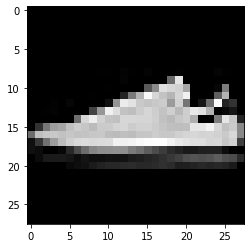

In [147]:
plt.imshow(f.iloc[6].values.reshape((28,28)),cmap="gray")

In [148]:
l.head(2)

,0
0,9
1,0


In [150]:
l['0'].unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8])

In [151]:
#### Dataset
## Which takes the path of the folder where these files are
## Return dictionary {'X':flattened image,'y':label}
### DataLoader which returns batches of size 32

In [152]:
class FashionData(Dataset):
    def __init__(self,path_of_folder):
        path_to_features=path_of_folder+"/fashion_train.csv"
        path_to_labels=path_of_folder+"/fashion_train_labels.csv"
        self.X=pd.read_csv(path_to_features).values
        self.y=pd.read_csv(path_to_labels)['0'].values
        
    def __len__(self):
        return len(self.y)
    def __getitem__(self,idx):
        x=self.X[idx]
        y=self.y[idx]
        batch={'X':x,'y':y}
        return batch

In [153]:
d=FashionData("/Users/gunnvantsaini/Data/Work/ML Course/Module 5 Neural Networks/Data")

In [155]:
D=DataLoader(d,batch_size=32)

In [156]:
next(iter(D)) ### Try writing your own model and the training loop, free to use any number of layers

{'X': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]),
 'y': tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
         4, 3, 0, 2, 4, 4, 5, 3])}

In [165]:
from utils import FashionData, Net

In [162]:
d=FashionData("/Users/gunnvantsaini/Data/Work/ML Course/Module 5 Neural Networks/Data")

In [163]:
D=D=DataLoader(d,batch_size=32)

In [168]:
kp=pd.read_csv("/Users/gunnvantsaini/OneDrive/project_codes/content/dl_basics/sony/data/facial-keypoints-detection/training.csv")

In [169]:
kp.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...


In [170]:
### 1. coordinates={''}
####2 .img (reshape==>150,150) ### np.resize()
### [1,2,3,4] 1,1
kp['Image'].dtype

dtype('O')

In [173]:
## mapping a function
np.array(kp['Image'].iloc[0].split(" "),dtype="float")

array([238., 236., 237., ...,  70.,  75.,  90.])

In [175]:
def split_array(row):
    return np.array(row.split(" "),dtype="float")
kp['Image_new']=kp['Image'].map(split_array)

In [176]:
kp['Image_new']

0       [238.0, 236.0, 237.0, 238.0, 240.0, 240.0, 239...
1       [219.0, 215.0, 204.0, 196.0, 204.0, 211.0, 212...
2       [144.0, 142.0, 159.0, 180.0, 188.0, 188.0, 184...
3       [193.0, 192.0, 193.0, 194.0, 194.0, 194.0, 193...
4       [147.0, 148.0, 160.0, 196.0, 215.0, 214.0, 216...
5       [167.0, 169.0, 170.0, 167.0, 156.0, 145.0, 106...
6       [109.0, 109.0, 125.0, 141.0, 145.0, 139.0, 120...
7       [178.0, 177.0, 178.0, 179.0, 179.0, 179.0, 181...
8       [164.0, 158.0, 118.0, 76.0, 66.0, 69.0, 59.0, ...
9       [226.0, 227.0, 225.0, 224.0, 221.0, 220.0, 215...
10      [52.0, 51.0, 54.0, 57.0, 57.0, 56.0, 55.0, 55....
11      [142.0, 124.0, 123.0, 133.0, 140.0, 147.0, 151...
12      [86.0, 93.0, 106.0, 114.0, 112.0, 110.0, 111.0...
13      [75.0, 65.0, 63.0, 75.0, 70.0, 78.0, 84.0, 97....
14      [119.0, 106.0, 101.0, 106.0, 89.0, 66.0, 67.0,...
15      [52.0, 54.0, 74.0, 76.0, 55.0, 48.0, 47.0, 41....
16      [201.0, 200.0, 202.0, 193.0, 124.0, 59.0, 53.0...
17      [202.0

In [177]:
[1,2,3,4,5,6,7,8,0] #3 by 3 np.resize()

[1, 2, 3, 4, 5, 6, 7, 8, 0]